# Cas Kaggle: Student Grade Prediction

# 1. Introducció 

Durant aquesta pràctica aplicarem tots els coneixements obtinguts a la materia per a un cas pràctic.
S'ens dona una base de dades proporcionada per la universitat de Minho, on s'han agafat mostres d'alumnes de dues escoles: Gabriel Pereira i Mousinho da Silveira.

Cada mostra conté atributs demogràfics, socials i relacionats amb els estudis. Juntament amb tres atributs que podem predir; G1, G2, G3. Els quals fan referencia a les notes dels periodes 1 i 2. I la nota final que es G3. Com atribut objectiu s'utilitzarà només G3, ja que el seu resultat és la mitja de G1 i G2, i no trobo útil calcular-les.

La base de dades no conté moltes mostres, per tant l'objectiu en general no serà aconseguir un model predictor molt bó, sino analitzar la base de dades per a veure quins son els factors més determinants a l'hora d'aconseguir bona o mala nota.

# 2. Dependencies

Abans de començar amb l'analisi, aquestes son les llibreries principalment utilitzades:

- Numpy: Estructurar i operar matrius
- Pandas: Per a manipular la BD
- Seaborn i Matplotlib: Visualitzar els resultats amb gràfiques i altres mètodes 2D i 3D.
- Scikit-learn: Separar la base de dades i entrenar models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, accuracy_score, f1_score

# 3. Explorant la base de dades

Començem important la base de dades i explorant que podem veure a simple vista. Degut a que l'atribut G1 i G2, formen la suma de l'atribut a predir, i per tant la seva correlació és altísima, l'eliminarem del dataset desde l'inici.

In [2]:
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

df = load_dataset('student-mat.csv')
data = df.values

l_column = list(df.columns)
x = data[:, :30]  # Caracteristiques (x)
y = data[:, 32]  # Atribut y --> variable dependent del nostre model

df = df.drop(['G1', 'G2'], axis=1)

print("Dimensionalitat de la BBDD nostre:", df.shape)
print("Dimensionalitat de les entrades X nostre", x.shape)
print("Dimensionalitat de l'atribut Y nostre", y.shape)

Dimensionalitat de la BBDD nostre: (395, 31)
Dimensionalitat de les entrades X nostre (395, 30)
Dimensionalitat de l'atribut Y nostre (395,)


Tenim 33 atributs, dels quals utilitzarem 30 per a intentar predir l'atribut G3.
Tenim 395 mostres, per tant tenim molt poca varietat de la qual obtenir bones prediccions, i els nostres models agafaran tendencia a fer overfitting.

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,10


## Els nostres atributs contenen la següent informació:

1. school - escola de l'estudiant (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - genere de l'estudiant (binary: 'F' - female or 'M' - male)
3. age - edat de l'estudiant (numeric: from 15 to 22)
4. address - tipus d'urbanització (binary: 'U' - urban or 'R' - rural)
5. famsize - tamany de la familia (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - Estat civil dels pares (binary: 'T' - living together or 'A' - apart)
7. Medu - Educació de la mare (numeric: 0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 (secondary education) or 4 (higher education)
8. Fedu - Educació del pare (numeric: 0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 (secondary education) or 4 (higher education)
9. Mjob - Treball de la mare (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - Treball del pare (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - Raó per a escollir l'escola (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - Tutor principal (nominal: 'mother', 'father' or 'other')
13. traveltime - Temps de trajecte (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - Temps invertit estudiant (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - Número d'assignatures suspeses altres anys (numeric: n if 1<=n<3, else 4)
16. schoolsup - Suport educacional extra (binary: yes or no)
17. famsup - Suport educacional familiar (binary: yes or no)
18. paid - Clases extra pagades (Math or Portuguese) (binary: yes or no)
19. activities - Activitats extracurriculars (binary: yes or no)
20. nursery - Va assistir a l'escola de bressols (binary: yes or no)
21. higher - Vol estudiar uns estudis més avançats (binary: yes or no)
22. internet - Accés a internet a casa (binary: yes or no)
23. romantic - En una relació romàntica (binary: yes or no)
24. famrel - Qualitat de la relació familiar (numeric: from 1 - very bad to 5 - excellent)
25. freetime - Temps lliure (numeric: from 1 - very low to 5 - very high)
26. goout - Temps sortint amb els amics (numeric: from 1 - very low to 5 - very high)
27. Dalc - Consumició d'alcohol durant els dies hàbils (numeric: from 1 - very low to 5 - very high)
28. Walc - Consumició d'alcohol durant el fi de setmana (numeric: from 1 - very low to 5 - very high)
29. health - Estat de salut (numeric: from 1 - very bad to 5 - very good)
30. absences - Quantitat d'absencies a classe (numeric: from 0 to 93)

Comprobem que les nostres dades contenen els valors correctament, i comprovem si tenim algun NULL:

In [4]:
for i in df.columns:
        if df[i].dtype == 'object':
            print(f"{i} \nNaNs: {df[i].isna().sum()}\nValues: {df[i].unique()}", )
        else:
            print(f"{i} \nNaNs: {df[i].isna().sum()}\nMean_std: {df[i].mean():.3f} {df[i].std():.3f}", )

school 
NaNs: 0
Values: ['GP' 'MS']
sex 
NaNs: 0
Values: ['F' 'M']
age 
NaNs: 0
Mean_std: 16.696 1.276
address 
NaNs: 0
Values: ['U' 'R']
famsize 
NaNs: 0
Values: ['GT3' 'LE3']
Pstatus 
NaNs: 0
Values: ['A' 'T']
Medu 
NaNs: 0
Mean_std: 2.749 1.095
Fedu 
NaNs: 0
Mean_std: 2.522 1.088
Mjob 
NaNs: 0
Values: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob 
NaNs: 0
Values: ['teacher' 'other' 'services' 'health' 'at_home']
reason 
NaNs: 0
Values: ['course' 'other' 'home' 'reputation']
guardian 
NaNs: 0
Values: ['mother' 'father' 'other']
traveltime 
NaNs: 0
Mean_std: 1.448 0.698
studytime 
NaNs: 0
Mean_std: 2.035 0.839
failures 
NaNs: 0
Mean_std: 0.334 0.744
schoolsup 
NaNs: 0
Values: ['yes' 'no']
famsup 
NaNs: 0
Values: ['no' 'yes']
paid 
NaNs: 0
Values: ['no' 'yes']
activities 
NaNs: 0
Values: ['no' 'yes']
nursery 
NaNs: 0
Values: ['yes' 'no']
higher 
NaNs: 0
Values: ['yes' 'no']
internet 
NaNs: 0
Values: ['no' 'yes']
romantic 
NaNs: 0
Values: ['no' 'yes']
famrel 
NaNs: 0
Mean_std: 

No tenim NULLs i tampoc cap valor diferent dels esperats. Per terminar de preparar les dades, pasarem els atributs categorics i binaris a numerics, per a poder utilitzar-los correctament.

In [5]:
# Columna 'school', Values = 'GP','MS'
df['school'] = df['school'].replace('GP', 1)
df['school'] = df['school'].replace('MS', 0)

# Columna 'sex', Values = 'F','M'
df['sex'] = df['sex'].replace('F', 1)
df['sex'] = df['sex'].replace('M', 0)

# Columna 'address', Values = 'U','R'
df['address'] = df['address'].replace('U', 1)
df['address'] = df['address'].replace('R', 0)

# Columna 'famsize', Values = 'GT3','LE3'
df['famsize'] = df['famsize'].replace('GT3', 1)
df['famsize'] = df['famsize'].replace('LE3', 0)

# Columna 'Pstatus', Values = 'A','T'
df['Pstatus'] = df['Pstatus'].replace('A', 1)
df['Pstatus'] = df['Pstatus'].replace('T', 0)

# Columna 'Mjob', Values = 'at_home','health', 'other', 'services', 'teacher'
df['Mjob'] = df['Mjob'].replace('at_home', 0)
df['Mjob'] = df['Mjob'].replace('health', 1)
df['Mjob'] = df['Mjob'].replace('other', 2)
df['Mjob'] = df['Mjob'].replace('services', 3)
df['Mjob'] = df['Mjob'].replace('teacher', 4)

# Columna 'Fjob', Values = 'at_home','health', 'other', 'services', 'teacher'
df['Fjob'] = df['Fjob'].replace('at_home', 0)
df['Fjob'] = df['Fjob'].replace('health', 1)
df['Fjob'] = df['Fjob'].replace('other', 2)
df['Fjob'] = df['Fjob'].replace('services', 3)
df['Fjob'] = df['Fjob'].replace('teacher', 4)

# Columna 'reason', Values = 'course', 'other', 'home', 'reputation'
df['reason'] = df['reason'].replace('course', 0)
df['reason'] = df['reason'].replace('other', 1)
df['reason'] = df['reason'].replace('home', 2)
df['reason'] = df['reason'].replace('reputation', 3)

# Columna 'guardian', Values = 'mother', 'father', 'other'
df['guardian'] = df['guardian'].replace('mother', 0)
df['guardian'] = df['guardian'].replace('father', 1)
df['guardian'] = df['guardian'].replace('other', 2)

# Columna 'schoolsup', Values = 'no', 'yes'
df['schoolsup'] = df['schoolsup'].replace('no', 0)
df['schoolsup'] = df['schoolsup'].replace('yes', 1)

# Columna 'famsup', Values = 'no', 'yes'
df['famsup'] = df['famsup'].replace('no', 0)
df['famsup'] = df['famsup'].replace('yes', 1)

# Columna 'paid', Values = 'no', 'yes'
df['paid'] = df['paid'].replace('no', 0)
df['paid'] = df['paid'].replace('yes', 1)

# Columna 'activities', Values = 'no', 'yes'
df['activities'] = df['activities'].replace('no', 0)
df['activities'] = df['activities'].replace('yes', 1)

# Columna 'nursery', Values = 'no', 'yes'
df['nursery'] = df['nursery'].replace('no', 0)
df['nursery'] = df['nursery'].replace('yes', 1)

# Columna 'higher', Values = 'no', 'yes'
df['higher'] = df['higher'].replace('no', 0)
df['higher'] = df['higher'].replace('yes', 1)

# Columna 'internet', Values = 'no', 'yes'
df['internet'] = df['internet'].replace('no', 0)
df['internet'] = df['internet'].replace('yes', 1)

# Columna 'romantic', Values = 'no', 'yes'
df['romantic'] = df['romantic'].replace('no', 0)
df['romantic'] = df['romantic'].replace('yes', 1)

df = df.apply(pd.to_numeric) # Passem totes les variables a numeric, per si algun valor s'ha guardat en string


# 4. Analitzant la base de dades

Mirem la correlació entre els atributs d'entrada per entendre millor les dades

<BarContainer object of 30 artists>

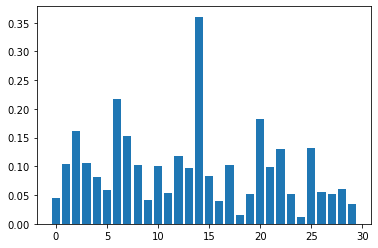

In [7]:
correlacio = df.corr()['G3']

plt.figure()

# apliquem el valor absolut, per diferenciarles millor
# ax = sns.heatmap(abs(correlacio), annot=True, linewidths=.5)
plt.bar(np.arange(30), abs(correlacio[:-1]))

In [8]:
abs(correlacio[:-1])

school        0.045017
sex           0.103456
age           0.161579
address       0.105756
famsize       0.081407
Pstatus       0.058009
Medu          0.217147
Fedu          0.152457
Mjob          0.102082
Fjob          0.042286
reason        0.099773
guardian      0.054193
traveltime    0.117142
studytime     0.097820
failures      0.360415
schoolsup     0.082788
famsup        0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic      0.129970
famrel        0.051363
freetime      0.011307
goout         0.132791
Dalc          0.054660
Walc          0.051939
health        0.061335
absences      0.034247
Name: G3, dtype: float64

Amb la correlació amb l'atribut G3, podem separar temporalment els atributs en tres grups:
- Baixa correlació (x < 0.07): school, Pstatus, Fjob, guardian, famsup, activities, nursery, famrel, freetime, Dalc, Walc, health, absences.
- Correlació mitjana(0.07 < x < 0.15): sex, address, famsize, Mjob, reason, traveltime, studytime, schoolsup, paid, internet, romantic, goout.
- Alta correlació (x > 0.15): age, Medu, Fedu, failures, higher.

Aquestes correlacions no son una guia definitiva, ja que depenent del model que utilitzem, alguns atributs poden no tenir correlació directa amb l'atribut G3, però la combinació entre un atribut i altre si que pot tenir una alta correlació amb G3. Utilitzarem aquesta separació per a poder investigar que és el que passa a cada atribut i si realment tenen correlació amb l'atribut a predir.

Observem gràficament la relació entre els atributs d'entrada i l'atribut a predir del grup d'alta correlació:

<AxesSubplot:xlabel='age', ylabel='G3'>

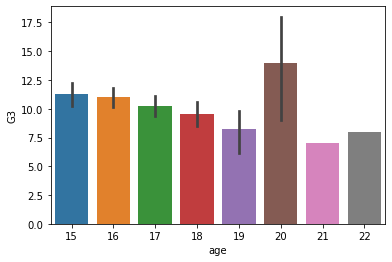

In [11]:
sns.barplot(data=df, x="age", y="G3")

<AxesSubplot:xlabel='Medu', ylabel='G3'>

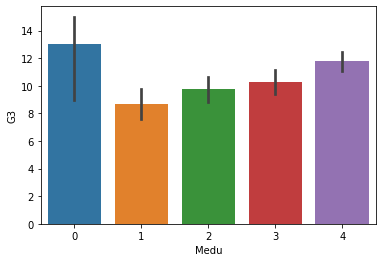

In [12]:
sns.barplot(data=df, x="Medu", y="G3")

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

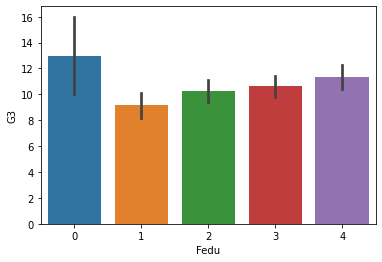

In [13]:
sns.barplot(data=df, x="Fedu", y="G3")

<AxesSubplot:xlabel='failures', ylabel='G3'>

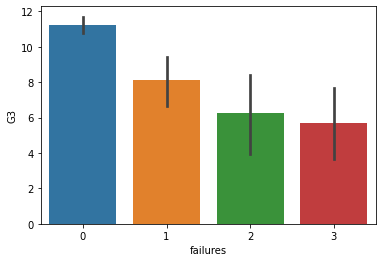

In [14]:
sns.barplot(data=df, x="failures", y="G3")

<AxesSubplot:xlabel='higher', ylabel='G3'>

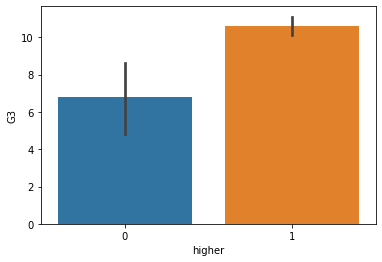

In [15]:
sns.barplot(data=df, x="higher", y="G3")

Podem observar com el grup d'alta correlació té coherencia, ja que la mitjana de les notes puja quan els estudiants volen cursar estudis superiors (higher = 1), quantes menys assignatures ha suspés previament (failures). També podem veure casos inesperats, com que si té algun dels pares sense educació (Fedu or Medu = 0) la seva mitjana es més alta, i després la resta de valors, la mitjana agafa una tendencia a pujar a mesura que l'educació dels pares augmenta. Una possible resposta a això pot ser que els pares sense educació imposen més importancia als estudis als seus fills. Amb l'edat trobem un cas diferent, la mitjana va baixant amb l'edat excepte als 20, el qual té uns valors molt més alts.

Per a comprobar si les dades son correctes, compararem la quantitat de mostres d'aquests valors per a veure si es tracta d'una desviació degut a la poca informació que tenim a la BD.

In [25]:
print('Tenim: ' + str((df.Medu == 0).sum()) + ' mostres amb Medu=0 de 395 mostres')
print('Tenim: ' + str((df.Fedu == 0).sum()) + ' mostres amb Fedu=0 de 395 mostres')
print('Tenim: ' + str((df.age == 20).sum()) + ' mostres amb age=20 de 395 mostres')

Tenim: 3 mostres amb Medu=0 de 395 mostres
Tenim: 2 mostres amb Fedu=0 de 395 mostres
Tenim: 3 mostres amb age=20 de 395 mostres


Com podem veure, aquests valors extranys es deuen a la poca quantitat de mostres que tenim. Com es tracta de 2-3 mostres per columna, la millor opció és eliminar aquests outliers de la nostra BD

In [26]:
print("Dimensionalitat de la BBDD abans:", df.shape)
df.drop(df[df['Medu'] == 0].index, inplace = True)
df.drop(df[df['Fedu'] == 0].index, inplace = True)
df.drop(df[df['age'] == 20].index, inplace = True)
print("Dimensionalitat de la BBDD després:", df.shape)

Dimensionalitat de la BBDD abans: (395, 31)
Dimensionalitat de la BBDD després: (387, 31)


Degut a la poca quantitat de mostres, no eliminarem els outliers de columnes amb menys correlació, ja que segurament no tinguin molt impacte i poden perjudicar a la quantitat d'informació dels atributs amb molta correlació. Igualment, mirarem la relació per si podem trobar un cas en especific, o per entendre millor les dades.

Grup de mitjana correlació:

<AxesSubplot:xlabel='sex', ylabel='G3'>

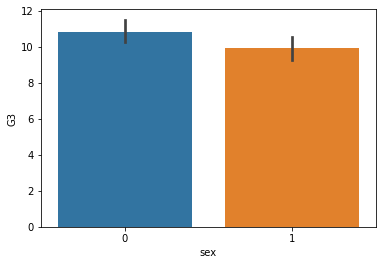

In [27]:
sns.barplot(data=df, x="sex", y="G3")

<AxesSubplot:xlabel='address', ylabel='G3'>

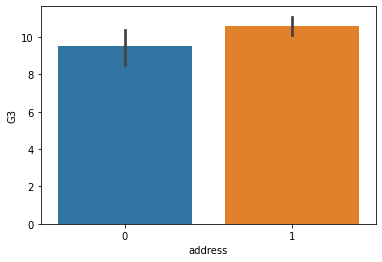

In [28]:
sns.barplot(data=df, x="address", y="G3")

<AxesSubplot:xlabel='famsize', ylabel='G3'>

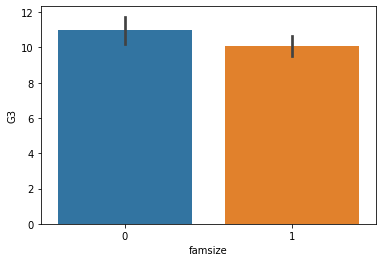

In [29]:
sns.barplot(data=df, x="famsize", y="G3")

<AxesSubplot:xlabel='Mjob', ylabel='G3'>

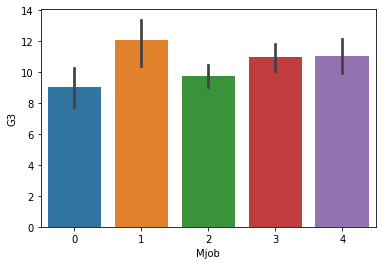

In [30]:
sns.barplot(data=df, x="Mjob", y="G3")

<AxesSubplot:xlabel='reason', ylabel='G3'>

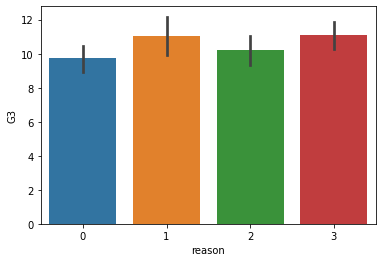

In [31]:
sns.barplot(data=df, x="reason", y="G3")

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

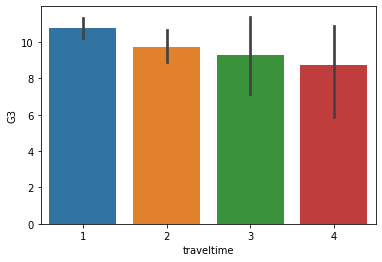

In [32]:
sns.barplot(data=df, x="traveltime", y="G3")

<AxesSubplot:xlabel='studytime', ylabel='G3'>

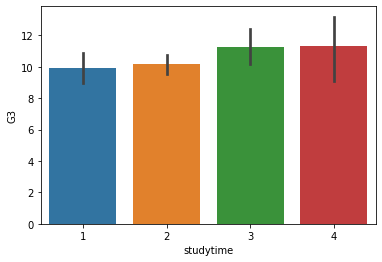

In [33]:
sns.barplot(data=df, x="studytime", y="G3")

<AxesSubplot:xlabel='schoolsup', ylabel='G3'>

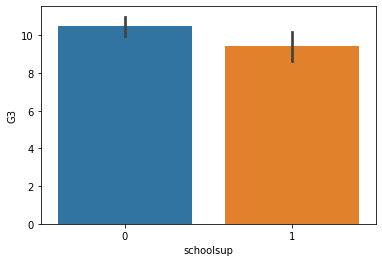

In [34]:
sns.barplot(data=df, x="schoolsup", y="G3")

<AxesSubplot:xlabel='paid', ylabel='G3'>

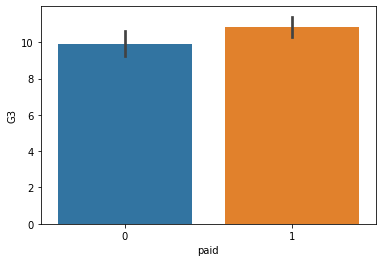

In [35]:
sns.barplot(data=df, x="paid", y="G3")

<AxesSubplot:xlabel='internet', ylabel='G3'>

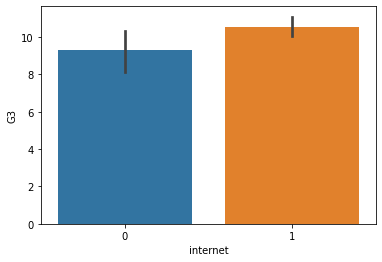

In [36]:
sns.barplot(data=df, x="internet", y="G3")

<AxesSubplot:xlabel='romantic', ylabel='G3'>

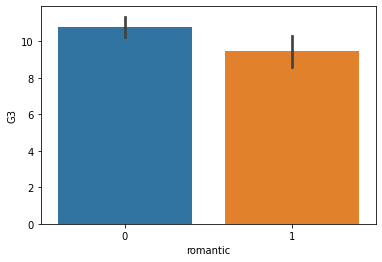

In [37]:
sns.barplot(data=df, x="romantic", y="G3")

<AxesSubplot:xlabel='goout', ylabel='G3'>

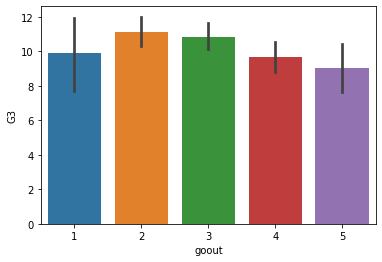

In [38]:
sns.barplot(data=df, x="goout", y="G3")

sex, address, famsize, Mjob, reason, traveltime, studytime, schoolsup, paid, internet, romantic, goout.